In [1]:
#Loading libraries
library(tidyverse)
library(tidymodels)
set.seed(1234)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Introduction to the dataset: Diabetes vs Medical Predictors

Diabetes is a chronic condition that affects many individuals. It interrupts the process of obtaining energy. During metabolism the body breaks down food into glucose (sugar). This gets released into the bloodstream creating a signal that triggers the release of insulin by the pancreas. The release of insulin allows the body to recognize the sugar as energy which can be used by cells, decreasing the level of glucose in the blood. When an individual is diabetic, the body does not make enough insulin impacting the uptake of sugar from the bloodstream. This causes many health conditions such as heart disease, kidney disease, and much more. 

This dataset is obtained from the National Institute of Diabetes and Digestive and Kidney Disease. It considers female patients from a Pima Indian heritage that are at least 21 years old.  

The goal of this project is to identify whether individuals have diabetes based on diagnostic  measurements. The medical predictors being considered as the diagnostic measurements include, glucose levels, BMI, insulin, pregnancy, and diabetes pedigree function. 

**Variables:**

1. Pregnancies: Represents number of pregnancies for patients.
2. Glucose: Represents glucose levels for patients on a scale of mg/dL. A level of <99 mg/dL means normal levels, 100-125 mg/dL indicates pre-diabetes, and >126 mg/dL means diabetes.
3. BloodPressure: Average blood pressure for patients in mmHg. A level of below 80 is considered normal.
4. SkinThickness: Normal levels are 1 to 4 mm. Units here are mm^-1.
5. Insulin: Represents Insulin levels in mlU/L. Varies based on diabetic and glucose levels.
6. BMI: Represents obesity levels (based on Height and Weight). It is measured in kg/m^2. A normal BMI range is 18.5 to 24.9.
7. DiabetesPedigreeFunction: Represents the probability that a patient will have Diabetes on a scale of 0.08 to 2.42.
8. Age: Age of patients in years.
9. Outcome: Represents if patients tested positive for Diabetes. Categorical variable (Yes/No).

# Methods

- Cleaned data and did exploratory analysis
- Visualization of results
- Chose our predictors 
- Classification (explained below) 

Renamed the results from the outcome column from the original data set, ‘1’ to Diabetic and ‘0’ to Non Diabetic. We also used the as_factor() function to set outcome to categorical data. We then cleaned the data by removing rows which contained NA values in columns like Glucose, Blood Pressure and BMI. And we used the head() function to show the first few rows of the cleaned data. 

After that, we splitted the cleaned data into testing and training data, we set the split ratio to 80% training observations (about 2200) and 20% testing observations (about 500). 

Grouped up people who are Non-diabetic and Diabetic and calculated the respective means of the 8 variables: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age of those 2 different groups. 

We then created 6 diagrams from the cleaned data. 

1st graph: Bar chart to show the numbers of non Diabetic patients vs Diabetic patients from the data set. 

2nd graph: Scatter plot to show the relationship between Glucose and Insulin, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome. 

3rd graph Line graph that shows the relationship between the average BMI and number of pregnancies. 

4th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and Glucose, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

5th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and Insulin, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

6th graph: Scatter plot to show the relationship between the Diabetes Pedigree Function and BMI, with points that were coloured in red for Non-daibetic and blue for Diabetic based on the outcome.

**Importing the data**

In [87]:
url <- "https://raw.githubusercontent.com/akshaj-24/DSCI_100_group07/main/data/Diabetes_data.csv"

diabetes_data <- read_csv(url)

diabetes_data <- diabetes_data |>  # Setting Outcome as a categorical data since we are predicting this
                mutate(Outcome = as_factor(Outcome)) |>
                mutate(Outcome = fct_recode(Outcome, "Diabetic" = "1", "Non-Diabetic" = "0")) |> #Renaming the categories
                mutate(Outcome = as_factor(Outcome)) |>
                filter(Glucose>0) |> #Filtering NA values
                filter(BloodPressure>0) |>
                filter(BMI>0)

head(diabetes_data)

Rows: 2768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome     
1 0.627                    50  Diabetic    
2 0.351                    31  Non-Diabetic
3 0.672                    32  Diabetic    
4 0.167                    21  Non-Diabetic
5 2.288                    33  Diabetic    
6 0.201                    30  Non-Diabetic

In [88]:
# Splitting the data into training and testing data

diabetes_split <- initial_split(diabetes_data, prop = 0.81, strata = Outcome) #Setting split to be 80% to roughly have 2200 training observations and 500 testing observations
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

nrow(diabetes_training)
nrow(diabetes_testing)

[1] 2110

[1] 496

**Exploratory Analysis**

In [89]:
#Table 1: Mean values for diabetic and non diabetic individuals
mean_vals <- diabetes_training |>
                group_by(Outcome) |>
            summarize(mean_pregnancies = mean(Pregnancies),
                      mean_glucose = mean(Glucose),
                      mean_bp = mean(BloodPressure),
                      mean_skin_thickness = mean(SkinThickness),
                      mean_insulin = mean(Insulin),
                      mean_BMI = mean(BMI),
                      mean_DPF = mean(DiabetesPedigreeFunction),
                      mean_age = mean(Age))

mean_vals

Outcome      mean_pregnancies mean_glucose mean_bp  mean_skin_thickness
1 Non-Diabetic 3.263836         111.6338     70.43745 20.16073           
2 Diabetic     4.853350         140.8900     75.14665 24.01138           
  mean_insulin mean_BMI mean_DPF  mean_age
1  73.79075    30.66073 0.4400773 30.95603
2 106.91909    35.17649 0.5634387 36.45512

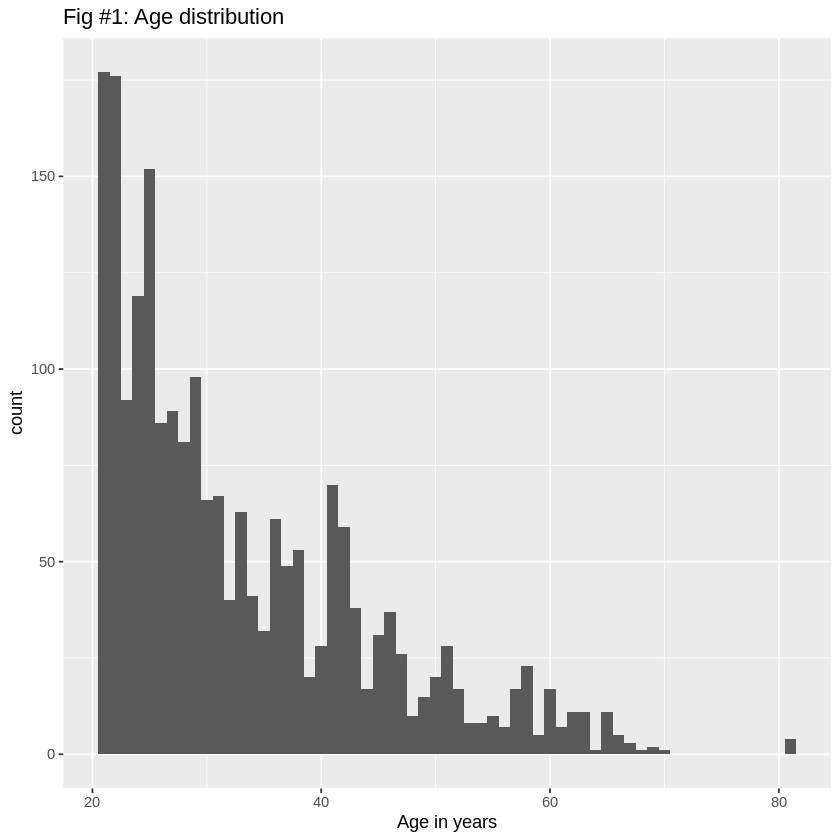

In [90]:
#Figure 1
age_dist <- diabetes_training |>
            ggplot(aes(x = Age)) +
            geom_histogram(binwidth = 1) + 
            xlab("Age in years") + 
            ggtitle("Fig #1: Age distribution")

age_dist

We can see that the majority of observations lie in the age group of 20-30 years old. There is a gradual decline in count for increasing ages.

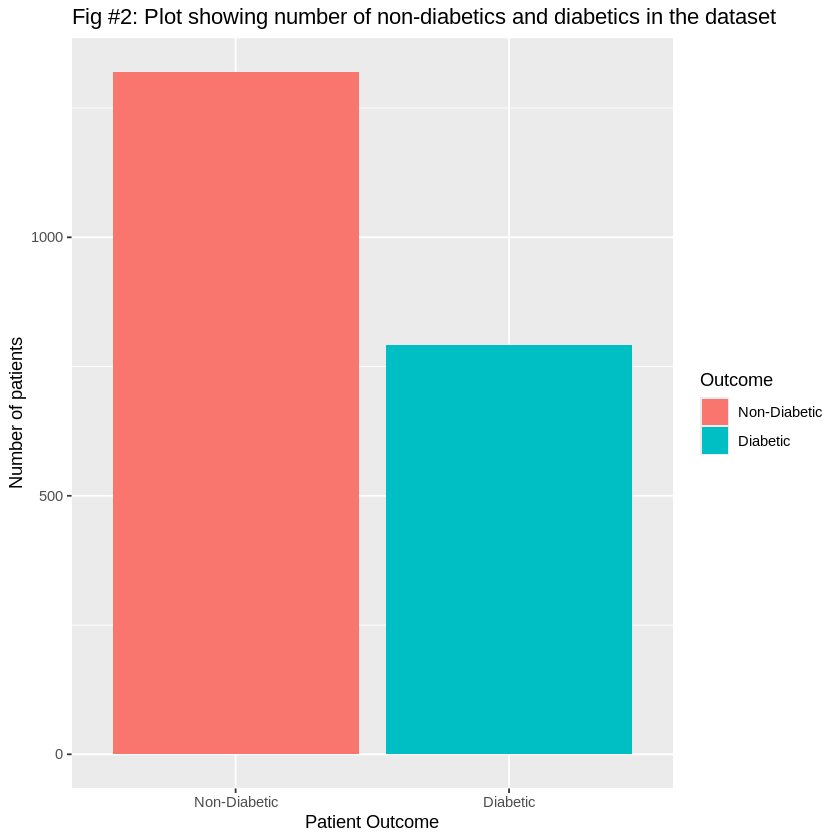

In [91]:
#Figure 2

diabetes_split <- ggplot(diabetes_training, aes(x=Outcome, fill = Outcome)) + 
                geom_bar() + 
                labs(x = "Patient Outcome",
                     y = "Number of patients") + 
                ggtitle("Fig #2: Plot showing number of non-diabetics and diabetics in the dataset")

diabetes_split

It can be observed that the number of diabetic people is around 850 out of 2200, making the dataset contain about 38.6% diabetics.

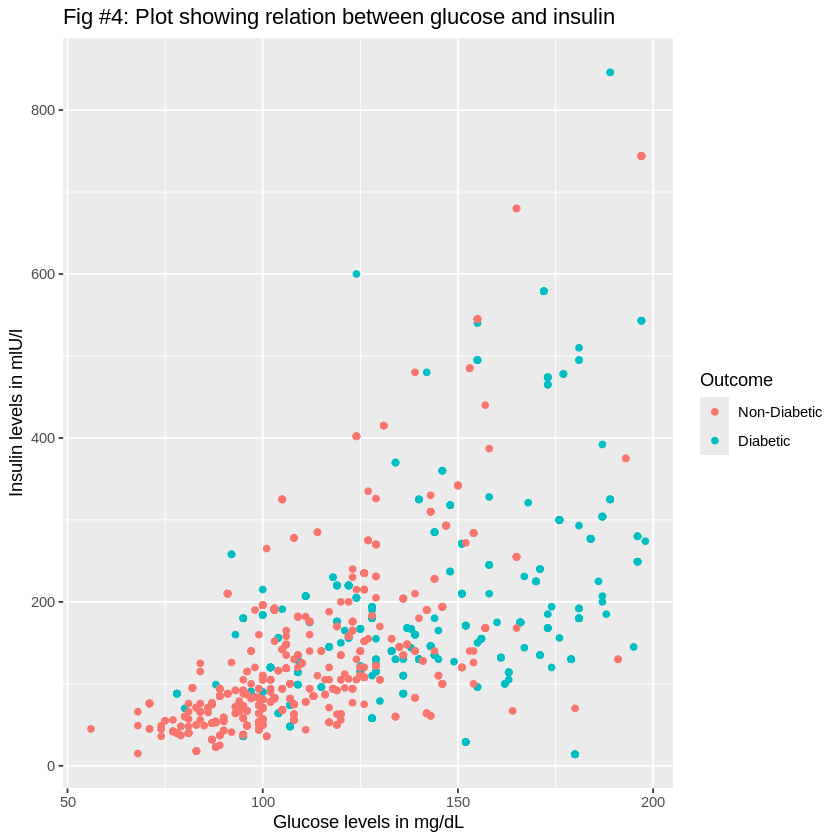

In [92]:
# Figure 3

glucose_insulin <- diabetes_training |>
            filter(Glucose > 0) |>
            filter(Insulin > 0) |>
            ggplot(aes(x = Glucose, y = Insulin, color = Outcome)) + 
            geom_point() + 
            labs(x = "Glucose levels in mg/dL",
                 y = "Insulin levels in mlU/l",
                color = "Outcome") + 
            ggtitle("Fig #4: Plot showing relation between glucose and insulin")

glucose_insulin

There is a strong positive relationship between the previous two variables, Insulin and Glucose. It can also be observed that the Diabetic patients have a higher Insluin and Glucose value than Non-diabetic patients.

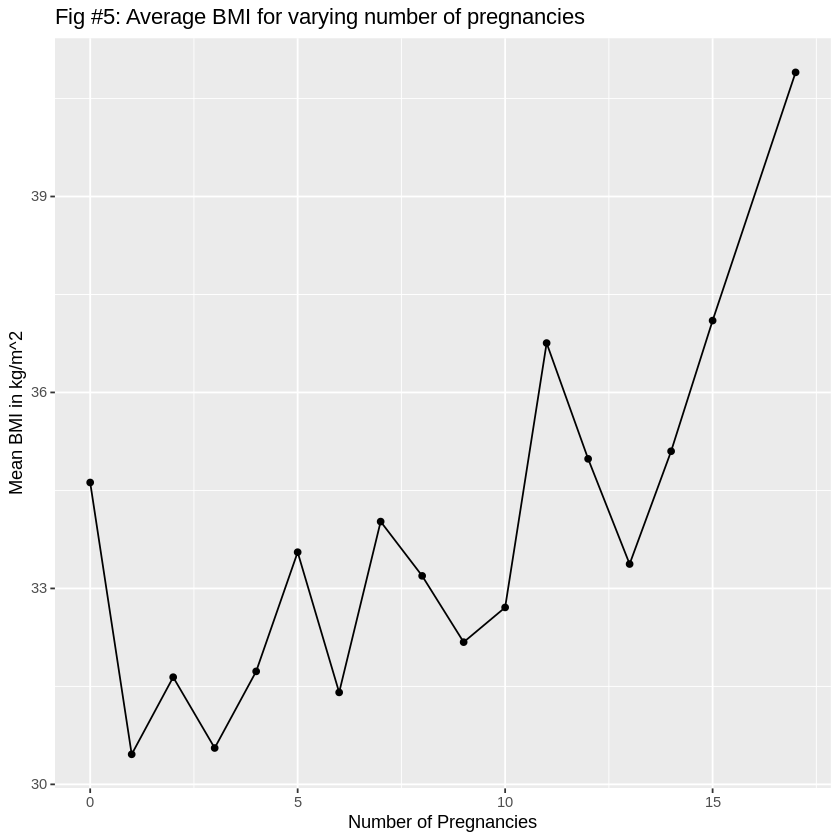

In [93]:
#Figure 5

preg_BMI_data <- diabetes_training |>
#            filter(Pregnancies > 0) |>
            filter(BMI > 0) |>
            group_by(Pregnancies) |>
            summarize(BMI_mean = mean(BMI))

preg_BMI <- preg_BMI_data |>
            ggplot(aes(x = Pregnancies, y = BMI_mean)) + 
            geom_point() + 
            geom_line() +
            labs(x = "Number of Pregnancies",
                 y = "Mean BMI in kg/m^2") + 
            ggtitle("Fig #5: Average BMI for varying number of pregnancies")

preg_BMI

It can be seen that the average BMI increases for increasing number of pregnancies.

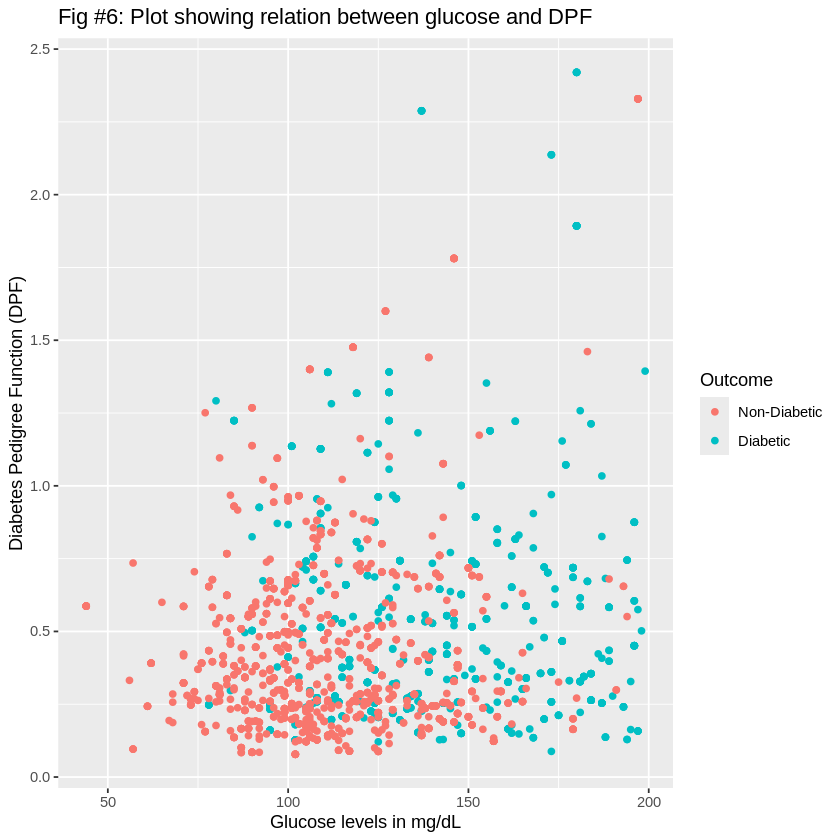

In [94]:
#Figure 6

glucose_prob <- diabetes_training |>
            filter(Glucose > 0) |>
            ggplot(aes(x=Glucose, y= DiabetesPedigreeFunction, color=Outcome)) + 
            geom_point() +
            labs(x = "Glucose levels in mg/dL",
                 y = "Diabetes Pedigree Function (DPF)",
                color = "Outcome") + 
            ggtitle("Fig #6: Plot showing relation between glucose and DPF")


glucose_prob

There is a weak positive relationship between the DPF (Diabetes Pedigree Function) and Glucose. This indicates that for increasing glucose levels, there is an increased probability for Diabetes which is supported by the fact that Diabetic individuals have a higher Glucose level.

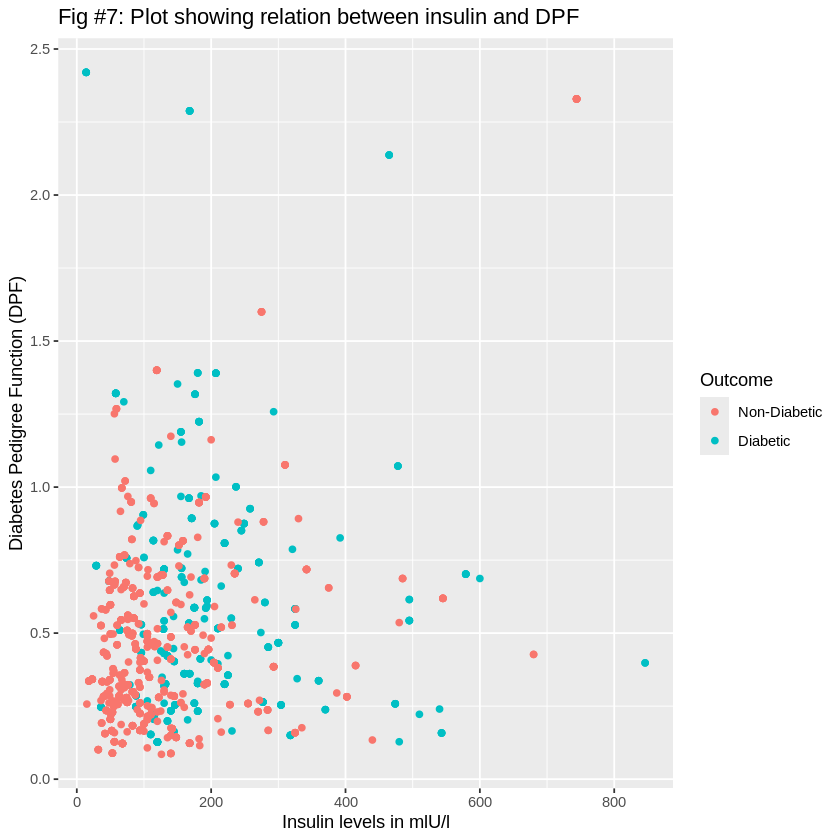

In [95]:
#Fig 7

glucose_prob <- diabetes_training |>
            filter(Insulin > 0) |>
            ggplot(aes(x=Insulin, y= DiabetesPedigreeFunction, color = Outcome)) + 
            geom_point() + 
            labs(y = "Diabetes Pedigree Function (DPF)",
                 x = "Insulin levels in mlU/l",
                color = "Outcome") + 
            ggtitle("Fig #7: Plot showing relation between insulin and DPF")


glucose_prob

There is a moderately positive relationship between the DPF (Diabetes Pedigree Function) and Insulin. This indicates that for increasing insulin levels, there is an increased probability for Diabetes. Diabetic individuals also have a higher mean insulin.

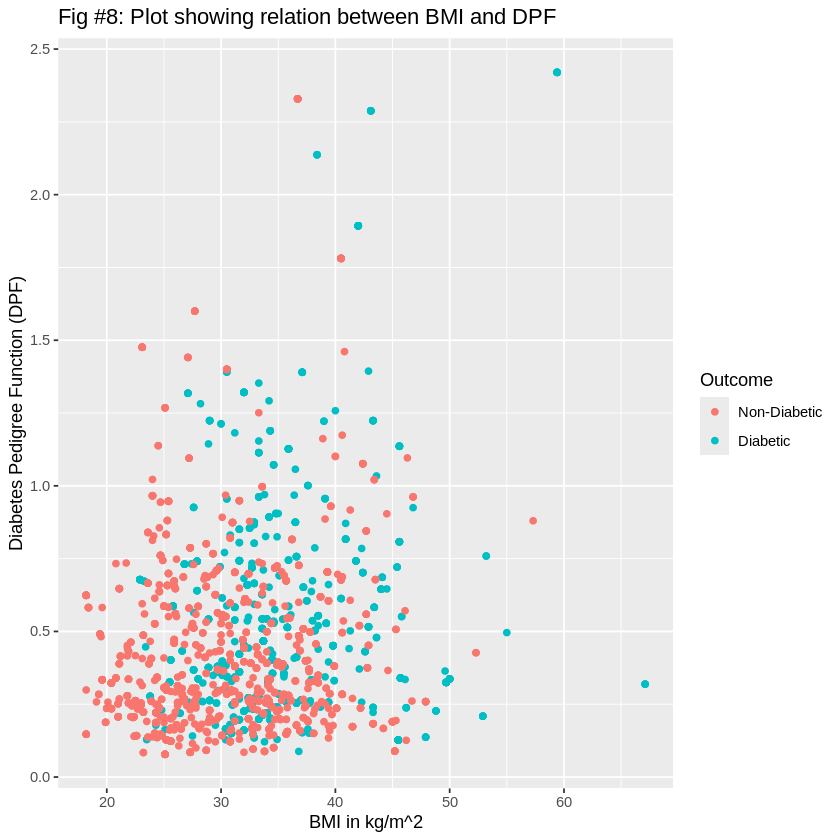

In [96]:
# Fig 8

glucose_prob <- diabetes_training |>
            filter(BMI > 0) |>
            ggplot(aes(x=BMI, y= DiabetesPedigreeFunction, color= Outcome)) + 
            geom_point() + 
            labs(y = "Diabetes Pedigree Function (DPF)",
                 x = "BMI in kg/m^2",
                color = "Outcome") + 
            ggtitle("Fig #8: Plot showing relation between BMI and DPF")


glucose_prob

There is a moderately positive relationship between the DPF (Diabetes Pedigree Function) and BMI. This indicates that for increasing BMI values, there is an increased probability for Diabetes. It can also be seen that Diabetic individuals generally have a higher BMI.

# Choosing our predictors:

Based on the graphs abouve, we can say that the following variables have an effect on the Outcome:
1. Glucose
2. BMI
3. Pregnancies
4. Insulin

# Classification

**Finding our best K values:**

Our goal is to find the best value for the $k$-nearest neighbours, providing the highest accuracy in predictions. In the code below, we create a classifier and perform cross-validation to split the training data, train the model with one set and use the other to evaluate it because we can not use testing data. Our next steps are:

1. Use the recipe function to center and scale the data.
2. Perform cross-validation with ten folds, using vfold_cv, on the training data. We use ten folds because if we only split the data once, the results strongly depend on the observations that end up being in the validation set, so using more folds increases the accuracy.
3. Create a k-nearest model with neighbours = tune() instead of a value to find the best value of k-nearest neighbours.
4. Add the recipe and model to a workflow, using tune_grid to fit. This worfklow runs cross validation on a range of k-nearest neighbours values that is specified in gridvals.
5. Find the best k value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and k on the x-axis.
6. Seeing that there is no overfitting and underfitting in the classifier.

In [97]:
#Creating recipe and performing standardization
diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Pregnancies + Insulin, data = diabetes_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

#K-nearest neighbor spec
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

#10-fold cross validation
diabetes_vfold <- vfold_cv(diabetes_training, v = 10, strata = Outcome)

gridvals <- tibble(neighbors = seq(1:50))

# Create workflow
knn_results <- workflow() |>
      add_recipe(diabetes_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = diabetes_vfold, grid = gridvals) |>
      collect_metrics() |>  # Collect metrics, filter for accuracy
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

#Table 2
head(knn_results)


neighbors mean     
1 1         0.9606566
2 2         0.9606566
3 3         0.9445337
4 4         0.9445337
5 5         0.9066212
6 6         0.9066212

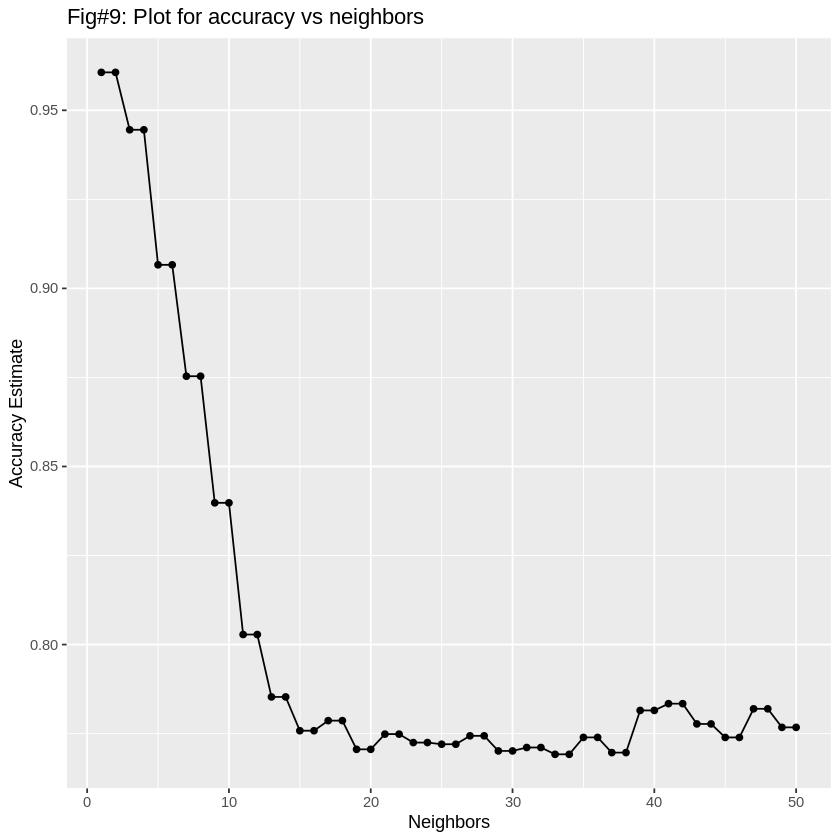

In [98]:
#Fig 9


accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Fig#9: Plot for accuracy vs neighbors") 

accuracy_versus_k

Based on this graph, we will choose k = 9 as our value despite it not having the highest accuracy. This is to prevent overfitting. Calculating accuracy for training dataset k=1, we get near 100% as the values are already seen by the model and a rough decision boundary is formed for k=1. When we calculate the accuracy for the unseen data it performs really bad that is the training error would be very low but the actual error would be very high. So it would be better if we choose an optimal k that has a lower accuracy but the error is less.

**Compare this to a majority classifier**

In [99]:
num_rows = nrow(diabetes_training)

proportions <- diabetes_training |>
                group_by(Outcome) |>
                summarize(count = n()) |>
                mutate(percentage = 100* (count / num_rows))

#Table 3
proportions

Outcome      count percentage
1 Non-Diabetic 1319  62.51185  
2 Diabetic      791  37.48815

The accuracy for a majority classifier is approx 62.51%, therefore our model is better than a majority classifier.

**Building the final model**

In [100]:
set.seed(7)

knn_spec_final <- nearest_neighbor(weight_func="rectangular", neighbors = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

fit <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(knn_spec_final) |>
    fit(data = diabetes_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.192891
Best kernel: rectangular
Best k: 12

**Checking prediction metrics**

In [101]:

diabetes_training_predictions <- predict(fit, diabetes_training) |>
                                    bind_cols(diabetes_training)

diabetes_conf_mat <- diabetes_training_predictions |> 
                    conf_mat(truth=Outcome, estimate=.pred_class) 

#Table 4
head(diabetes_training_predictions)

#Table 5
diabetes_conf_mat

diabetes_accuracy <- diabetes_training_predictions|> 
                metrics(truth = Outcome, estimate = .pred_class) |>
                filter(.metric == "accuracy")

#Table 6
diabetes_accuracy

.pred_class Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 Diabetic     6          148     72            35              0     33.6
2 Diabetic     8          183     64             0              0     23.3
3 Diabetic     0          137     40            35            168     43.1
4 Diabetic     3           78     50            32             88     31.0
5 Diabetic     2          197     70            45            543     30.5
6 Diabetic    10          168     74             0              0     38.0
  DiabetesPedigreeFunction Age Outcome 
1 0.627                    50  Diabetic
2 0.672                    32  Diabetic
3 2.288                    33  Diabetic
4 0.248                    26  Diabetic
5 0.158                    53  Diabetic
6 0.537                    34  Diabetic

              Truth
Prediction     Non-Diabetic Diabetic
  Non-Diabetic         1210      129
  Diabetic              109      662

.metric  .estimator .estimate
1 accuracy binary     0.8872038

Looking at the confusion matrix, we can calculate

1. Recall = $\frac{662}{662+129} = \frac{662}{791} = 83.7\%$

2. Precision = $\frac{662}{662+109} = \frac{662}{771} = 85.9\%$

Combining this with accuracy, we can say that our model does fairly well in predicting Diabetes however due to the recall value being in the mid 80 percentages, in a healthcare "high-stakes" environment, there is a significant room for improvement, which can be done by re-evaluating our predictors and also experimenting with different K values.

**Visualizing the predictions**

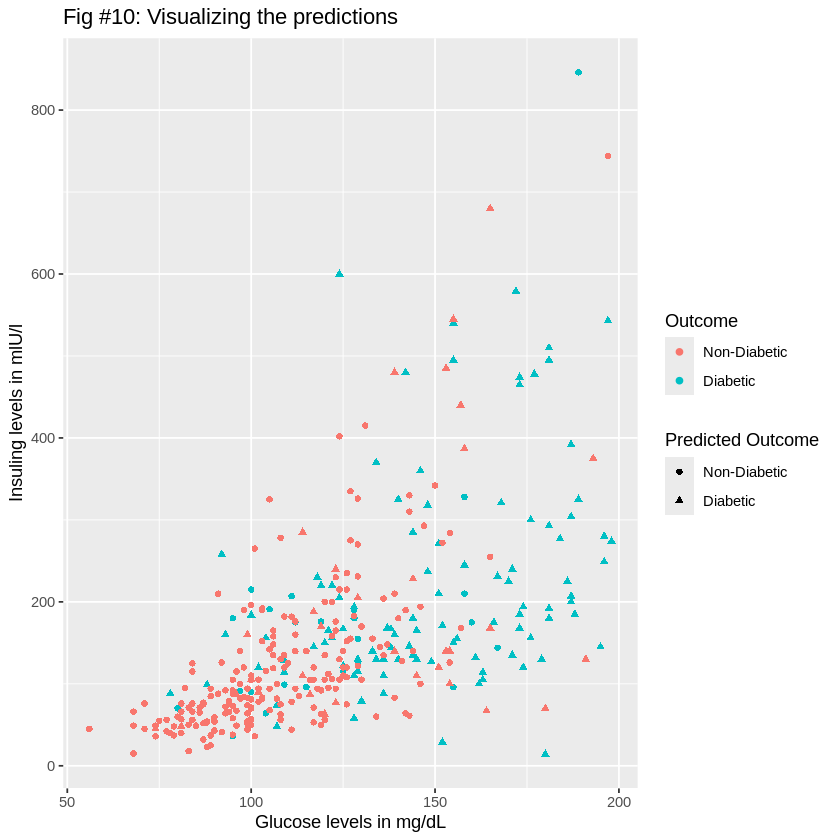

In [102]:
#Fig 10
glucose_insulin <- diabetes_training_predictions |>
            filter(Glucose > 0) |>
            filter(Insulin > 0) |>
            ggplot(aes(x = Glucose, y = Insulin, color = Outcome, shape = .pred_class)) + 
            geom_point() + 
            labs(x= "Glucose levels in mg/dL",
                y = "Insuling levels in mlU/l",
                color = "Outcome",
                shape = "Predicted Outcome") + 
            ggtitle("Fig #10: Visualizing the predictions")

glucose_insulin

Therefore we can see the visualization of the predictions. Red triangles represent Non-Diabetic outcomes that were predicted as Diabetic, and Blue circles represent Diabetic outcomes predicted as Non-Diabetic.

In [103]:


diabetes_testing_predictions <- predict(fit, diabetes_testing) |>
                                bind_cols(diabetes_testing)

testing_conf_mat <- diabetes_testing_predictions |>
                    conf_mat(truth=Outcome, estimate=.pred_class)

testing_accuracy <- diabetes_testing_predictions |> 
                metrics(truth = Outcome, estimate = .pred_class) |>
                filter(.metric == "accuracy")
#Table 7
testing_conf_mat
#Table 8
testing_accuracy

              Truth
Prediction     Non-Diabetic Diabetic
  Non-Diabetic          272       44
  Diabetic               38      142

.metric  .estimator .estimate
1 accuracy binary     0.8346774

Therefore our classifier is 83% accurate on data it has been tested on. 

It seems to overdiagnose (44) slightly more than underdiagnose (38) which is not a terrible error since the classifier is intended to be used before going to a medical official. Medically, it is better to be on the safe side by overdiagnosing. 

**Testing our model on new data (from same source) to test versatility:**

In [104]:
new_data <- read_csv("https://raw.githubusercontent.com/akshaj-24/DSCI_100_group07/main/data/diabetes_new_test.csv")

new_data <- new_data |> 
            mutate(Outcome = as_factor(Outcome)) |>
                mutate(Outcome = fct_recode(Outcome, "Diabetic" = "1", "Non-Diabetic" = "0")) |> #Renaming the categories
                mutate(Outcome = as_factor(Outcome)) |>
                filter(Glucose>0) |> #Filtering NA values
                filter(BloodPressure>0) |>
                filter(BMI>0)

#table 9
head(new_data)



Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome     
1 0.627                    50  Diabetic    
2 0.351                    31  Non-Diabetic
3 0.672                    32  Diabetic    
4 0.167                    21  Non-Diabetic
5 2.288                    33  Diabetic    
6 0.201                    30  Non-Diabetic

In [105]:
new_data_predictions <- predict(fit, new_data) |>
                                bind_cols(new_data)

new_conf_mat <- new_data_predictions |>
                    conf_mat(truth=Outcome, estimate=.pred_class)

new_accuracy <- new_data_predictions |> 
                metrics(truth = Outcome, estimate = .pred_class) |>
                filter(.metric == "accuracy")

#table 10
new_conf_mat
#table 11
new_accuracy

              Truth
Prediction     Non-Diabetic Diabetic
  Non-Diabetic          399       57
  Diabetic               76      192

.metric  .estimator .estimate
1 accuracy binary     0.8162983

Here we can see that our model performs quite well as the accuracy on new data it has not been trained or tested with is **81.63%**. However the model could still be improved since it has more predicted FALSE acutal TRUE (or false negatives) than what is acceptable for medical diagnosis. 

# Discussion


Based on the data collected, the results we found from the chosen predictors were what was initially expected. Between non-diabetic and diabetic groups, the average number of pregnancies is higher within diabetic individuals compared to the non-diabetic group. This conclusion was predicted as studies have found that people who experience gestational diabetes (the period of time between conception and birth) have a higher chance of developing diabetes after pregnancy. During pregnancy, the combination of hormonal changes results in the cells to not use insulin as effectively, resulting in gestational diabetes. This would mean that patients with many pregnancies would result in a higher risk of developing diabetes after pregnancy. 

The weak positive relationship between insulin and glucose between both the non-diabetic and diabetic patients was expected. This is because the ratio between insulin and blood glucose has to level out to allow efficient usage of energy within the cells. Diabetic patients seem to have a higher insulin and glucose ratio compared to non-diabetic patients. This could possibly be explained by treatment that is used for diabetes to help increase levels of insulin to counterbalance the elevated glucose concentration in the blood. Treatment of diabetes could explain the moderate positive relationship between DPF and insulin found in our data. The indication of increase in insulin levels also results in increased probability of diabetes could be utilized to predict individuals who are at higher risk of diabetes compared to others. 

Type 2 diabetes is the most common type of diabetes, and individuals who are overweight, or have obesity, along with other factors are more at risk of developing it. Diabetic individuals in the data were found to have a higher BMI compared to non-diabetic. This outcome along with the moderately positive relationship between DPF and BMI creates a reliable evidence and predictor to individuals at risk of diabetes. 

The classifier accuracy for the model is 84.27% which is relatively high and indicates that the classification performance is reliable for predicting diabetic and non-diabetic individuals. The reason for this is because instead of using the majority classifier, k value was used which is considered better as it allows higher accuracy. The major classifier was not used, as it will cause the accuracy to not be reliable as the data will be biased towards non-diabetic patients since they have a larger count. 

These results found from our data would allow measurements of insulin levels and other factors to predict the possibility of individuals having diabetes. It is also reliable evidence that supports already found research about diabetes and allows better understanding of the different factors that are influenced from diabetes. 


Reference: https://www.cdc.gov/diabetes/basics/risk-factors.html 

**Summary of predictors:**

1. Glucose and Insulin: The positive relationship between insulin and glucose between both the non-diabetic and diabetic patients was expected. This is because the ratio between insulin and blood glucose has to level out to allow efficient usage of energy within the cells. Diabetic patients seem to have a higher insulin and glucose ratio compared to non-diabetic patients. This could possibly be explained by treatment that is used for diabetes to help increase levels of insulin to counterbalance the elevated glucose concentration in the blood. Treatment of diabetes could explain the moderate positive relationship between DPF and insulin found in our data. The indication of increase in insulin levels also results in increased probability of diabetes could be utilized to predict individuals who are at higher risk of diabetes compared to others. 


2. Number of Pregnancies: Based on the data collected, the results we found from the chosen predictors were what was initially expected. Between non-diabetic and diabetic groups, the average number of pregnancies is higher within diabetic individuals compared to the non-diabetic group. This conclusion was predicted as studies have found that people who experience gestational diabetes (the period of time between conception and birth) have a higher chance of developing diabetes after pregnancy. Therefore, this would mean that as the number of pregnancies increase, the risk of developing type 2 diabetes also increases.


3. BMI: 

# References

**Dataset**

Aboelnaga, E. (2024, February 29). Diabetes. Kaggle. https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset 

Centers for Disease Control and Prevention. (2023, September 5). What is diabetes?. Centers for Disease Control and Prevention. 
    https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=With%20diabetes%2C%20your%20body%20either,releases%20it%20into%20your%20bloodstream. 


**Research and interpretation**

Centers for Disease Control and Prevention. (2022, April 5). Diabetes risk factors. Centers for Disease Control and Prevention. 
    https://www.cdc.gov/diabetes/basics/risk-factors.html 

Learning, U. M. (2016, October 6). Pima Indians Diabetes Database. Kaggle. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 
